# K-means clustering


## Introduction
In this Jupyter notebook,we will get into k-means clustering, a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid),serving as a prototype of the cluster. 

## Datasets
We will use "make_blobs" dataset in this case. make_blobs is a function for producing multi-dimensional datasets with a specified number of samples, features, and cluster centers. Here's a detailed description of function:
- n_samples: Total number of points equally divided among clusters. It can be an integer or an array of integers for different numbers of samples per cluster.
- n_features: Number of features for each sample.
- centers: Number of centers to generate, or the fixed center locations. If an integer is given, it generates that number of centers. If an array is provided, centers are placed at the points specified.
- cluster_std: Standard deviation of the clusters.
- random_state: Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.





C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

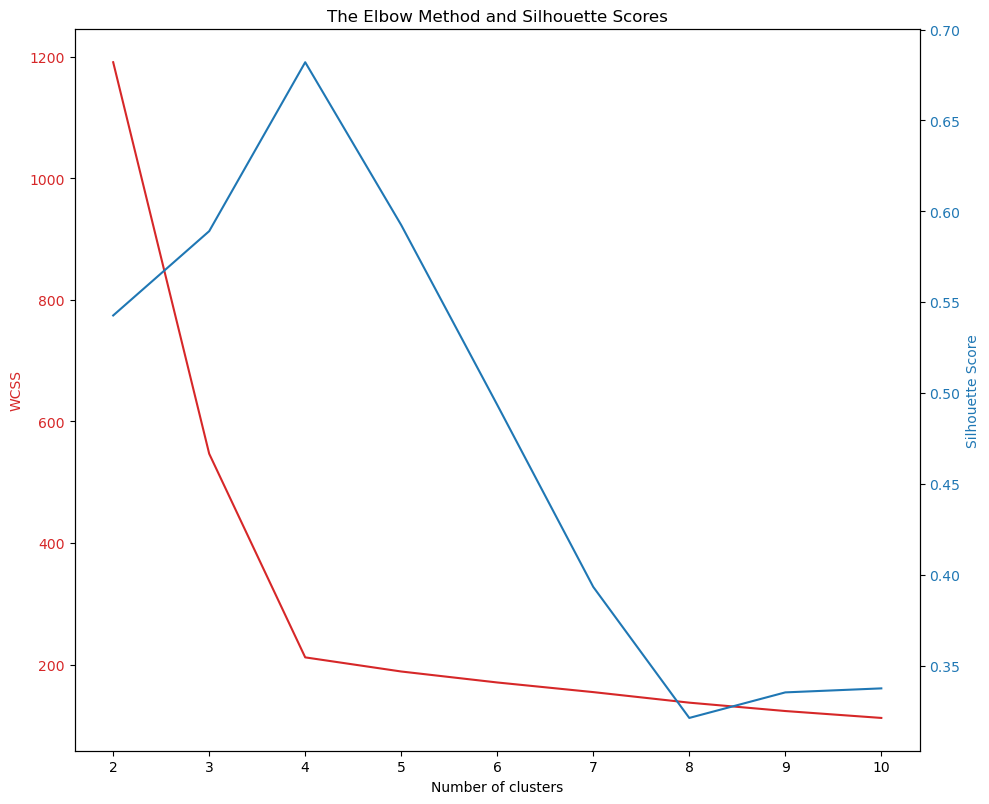

C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


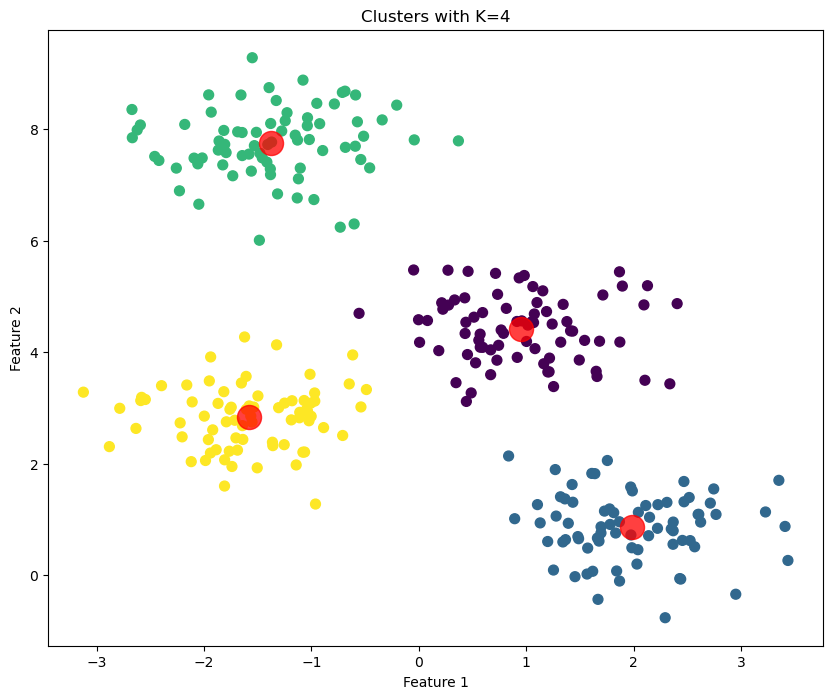

Silhouette Score for k=: 0.6819938690643478


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Data processing
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Trying different numbers of clusters
wcss = []
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters for silhouette calculation
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plotting the results onto a line graph to observe 'The Elbow' and Silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(range(2, 11), wcss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)  # We already handled the x-label with ax1
ax2.plot(range(2, 11), silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.title('The Elbow Method and Silhouette Scores')
plt.show()

# Apply K-Means to the dataset with the optimal number of clusters (assumed to be 4 here)
kmeans_optimal = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_optimal.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75)
plt.title('Clusters with K=4')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for k=: {silhouette_avg}")

C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


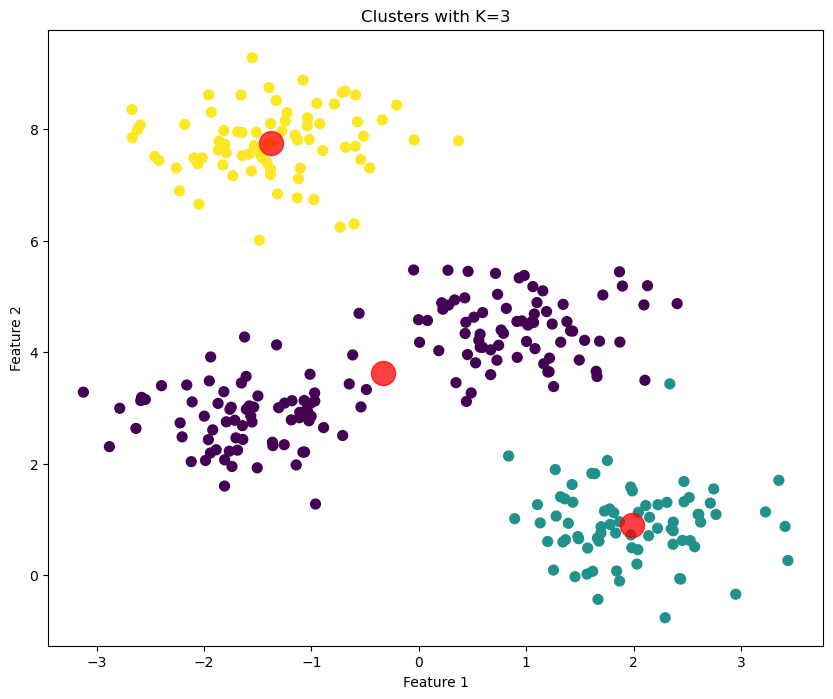

Silhouette Score for k=: 0.5890390393551768


In [25]:
# Apply K-Means to the dataset with the optimal number of clusters (assumed to be 3 here)
kmeans_optimal = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_optimal.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75)
plt.title('Clusters with K=3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for k=: {silhouette_avg}")

C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


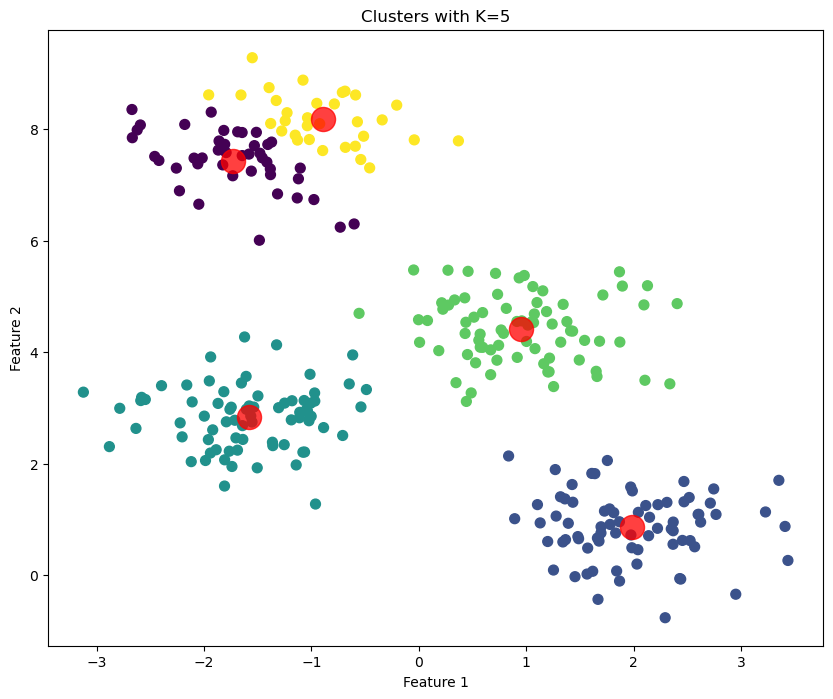

Silhouette Score for k=: 0.5923875148758644


In [24]:
# Apply K-Means to the dataset with the optimal number of clusters (assumed to be 5 here)
kmeans_optimal = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans_optimal.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
centers = kmeans_optimal.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75)
plt.title('Clusters with K=5')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score for k=: {silhouette_avg}")

## Result Interpretation
The silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### Results
- Silhouette Score for k=3: 0.5890. With k=3, the silhouette score suggests moderate separation between clusters. Each data point is, on average, more similar to its own cluster than to others. This indicates that the clustering model has a fair structure when the data is divided into three clusters.

- Silhouette Score for k=5: 0.5923. The score is almost unchanged from k=3, implying that increasing the clusters to five does not significantly improve the cluster structure. The clustering definition is not notably enhanced, suggesting that the data does not naturally partition into five distinct groups.

- Silhouette Score for k=4: 0.6819. The reduction in the silhouette score as k=4 signifies that the model can clearly distinguish different clusters and the outline of clusters making k=4 a better suitable choice for the data.

### Conclusion
Considering the silhouette scores for different values of k, it appears that k=4 offers a balance between cluster cohesion and separation. Thus, dividing the data into three clusters is potentially the most meaningful interpretation of the dataset's structure. The choice of k should also consider other factors, such as the context of the data and the specific use case of the clustering.